# **Relación filogenética de las bacterias periodontopatógenas**

En este trabajo se realizó el análisis de la relación filogenética de las principales bacterias de la microbiota oral y las bacterias presentes en la flora oral durante la Enfermedad Periodontal para conocer la distancia evolutiva existente entre ellas. 



## 1. Recoleccion de datos:

Se realizó la búsqueda de publicaciones cientifícas en las bibliotecas NCBI y Scielo para determinar las bacterias a estudiar. Se trabajo sobre las siguientes publicaciones:

- Aas JA, Paster BJ, Stokes LN, Olsen I, Dewhirst FE. Defining the normal bacterial flora of the oral cavity. J Clin Microbiol. 2005 Nov;43(11):5721-32. doi: 10.1128/JCM.43.11.5721-5732.2005. PMID: 16272510; PMCID: PMC1287824.

- Peña Sisto, Maritza, Calzado da Silva, Milagros, González Peña, Milagros, Cordero García, Sandra, & Azahares Argüello, Hernay. (2012). Patógenos periodontales y sus relaciones con enfermedades sistémicas. MEDISAN, 16(7), 1137-1148. http://scielo.sld.cu/scielo.php?script=sci_arttext&pid=S1029-30192012000700014&lng=es&tlng=es.

- Hurtado Camarena, A et al. Bacterias asociadas a enfermedades periodontales. Oral 2016; 17(54): 1374-1378. Disponible en: https://www.medigraphic.com/pdfs/oral/ora-2016/ora1654f.pdf 

- Badanian, Andrea, León, Eduardo Ponce de, Rodriguez, Lucía, Bascuas, Thais, Capo, Claudia, Battle, Alicia, Bueno, Luis, & Papone, Virginia. (2018). Detección de patógenos periodontales de una población con Periodontitis Agresiva en Uruguay mediante metodología convencional y molecular. Odontoestomatología, 20(32), 68-77. https://doi.org/10.22592/ode2018n32a9

##2. Búsqueda de Genes:


Se realizó la busqueda del gen **16s rARN** de cada bacteria en la base de datos **"NCBI Gene"** (https://www.ncbi.nlm.nih.gov/gene/) y se armó un archivo FASTA con cada secuencia.

El encabezado de cada secuencia contiene la siguiente informacion:
- Nombre de la bacteria
- Id de biblioteca NCBI
 




Archivo FASTA: Flora bacteriana bucal.txt 





##3. Dataset
Se armó tambien el dataset **"Flora_bacteriana_bucal"** con la biblioteca *pandas*. 


**Secuencias de interés (Bacterias periodontopatógenas):**
* Aggregatibacter actinomycetemcomitans
* Eikenella corrodens
* Fusobacterium nucleatum
* Porphyromonas gingivalis
* Prevotella intermedia
* Tannerella forsythia

**Secuencia de referencia**
* Escherichia coli

**Grupos externos (otras bacterias anaeróbias)**
* Bacteroides fragilis
* Clostridium perfingens

**Bacterias de la microbiota oral sana:**
* Actinomyces denticolens
* Actinomyces israelii
* Actinomyces naeslundii
* Actinomyces viscosus
* Capnocytophaga gingivalis
* Corynebacterium diphtheriae
* Corynebacterium matruchotii
* Filifactor alocis
* Lactobacillus acidophilus
* Leptotrichia buccalis
* Neisseria flavescens
* Nocardia brasiliensis
* Parvimonas micra
* Peptostreptococcus anaerobius
* Prevotella nigrescens
* Selenomonas sputigena
* Streptococcus mitis
* Streptococcus mutans
* Streptococcus sanguinis
* Treponema denticola
* Veillonella atypica
* Veillonella parvula





In [1]:
import pandas as pd

In [5]:
archivo = pd.read_csv("/content/Flora bacteriana bucal_dataset.txt", sep = "|", header = None)
archivo

bacterias_cavidad_bucal = pd.DataFrame()
bacterias_cavidad_bucal["id"] = archivo[1]
bacterias_cavidad_bucal["Nombre"] = archivo[0]



In [6]:
def convertir_referencia(referencia):
 if referencia == ">Aggregatibacter_actinomycetemcomitans" or referencia == ">Eikenella_corrodens" or referencia == ">Fusobacterium_nucleatum" or referencia == ">Porphyromonas_gingivalis" or referencia == ">Prevotella_intermedia" or referencia == ">Tannerella_forsythia":
   return "Secuencia de interés"
 elif referencia ==  ">Escherichia_coli":
   return "Secuencia de Referencia"
 elif referencia == ">Bacteroides_fragilis" or referencia == ">Clostridium_perfringens":
   return "Grupo externo"
 else:
   return "Microbiota oral sana"


In [7]:
def convertir_patogena(patogena):
  if patogena in [">Aggregatibacter_actinomycetemcomitans", ">Eikenella_corrodens",">Fusobacterium_nucleatum",">Porphyromonas_gingivalis",">Prevotella_intermedia", ">Tannerella_forsythia"]:
    return "Si"
  else: 
    return "No"

In [8]:
bacterias_cavidad_bucal["Periodontopatógena"]= bacterias_cavidad_bucal["Nombre"].map(convertir_patogena)


In [9]:
bacterias_cavidad_bucal["Referencia"]=  bacterias_cavidad_bucal["Nombre"].map(convertir_referencia)


In [10]:
bacterias_cavidad_bucal.head()

,id,Nombre,Periodontopatógena,Referencia
0,NR_026181.1,>Actinomyces_denticolens,No,Microbiota oral sana
1,NR_026227.1,>Actinomyces_israelii,No,Microbiota oral sana
2,NR_037033.1,>Actinomyces_naeslundii,No,Microbiota oral sana
3,NR_026228.1,>Actinomyces_viscosus,No,Microbiota oral sana
4,NR_029171.1,>Aggregatibacter_actinomycetemcomitans,Si,Secuencia de interés


<Axes: ylabel='Referencia'>

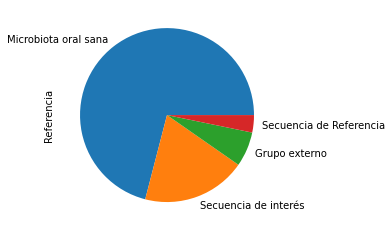

In [21]:
bacterias_cavidad_bucal["Referencia"].value_counts().plot.pie()


## 4. Alineamiento
Se utilizó el servidor en linea MAFFT ( https://mafft.cbrc.jp/alignment/server/) para realizar el alineamiento de nucleótidos con el archivo .fasta elaborado (Flora_bacteriana_bucal.fasta). 

- Parámetros para el alineamiento:
UPPERCASE / lowercase: 
same as input
Direction of nucleotide sequences:
same as input
Output order:
Same as input

Advanced settings:
Strategy: Auto (FFT-NS-1, FFT-NS-2, FFT-NS-i or L-INS-i; depends on data size)


Se guardo el alineamiento en un nuevo archivo FASTA con el nombre: **flora bucal aln.fasta**



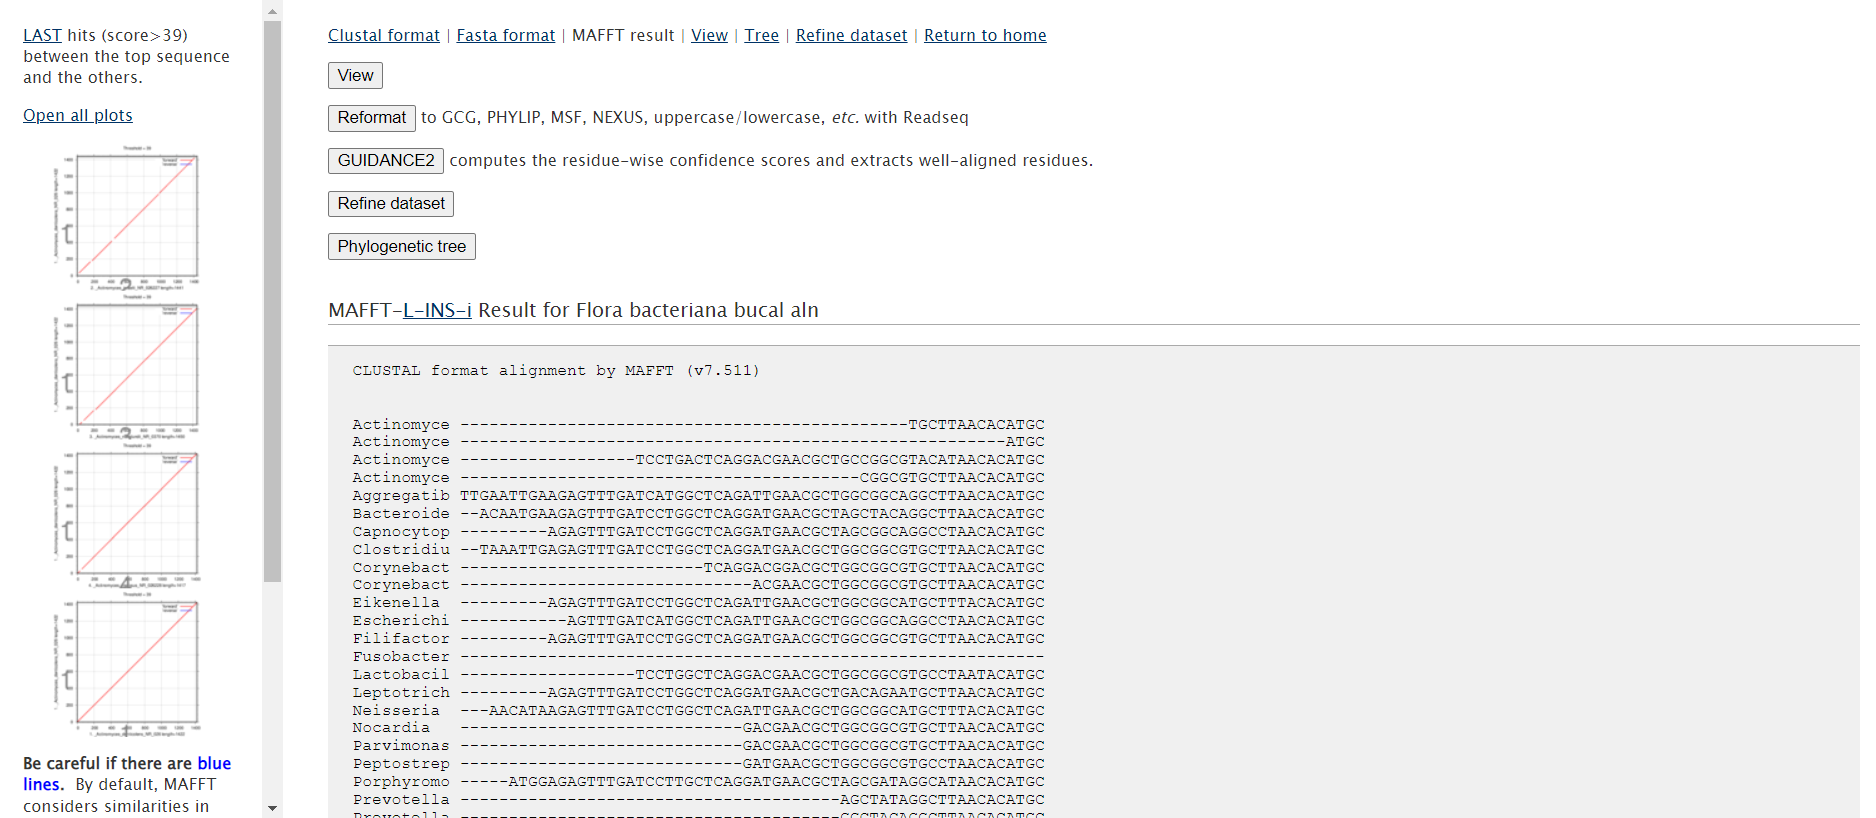

##5. Visualizacion y edición del alineamiento:
Se utilizo el programa AliView para analizar visualmente el alineamiento y editar lo que fuera necesario.
En este caso se editaron los extremos. 

Se guardo el archivo en un nuevo archivo FASTA  con el nombre Flora bucal aln_cut.fasta

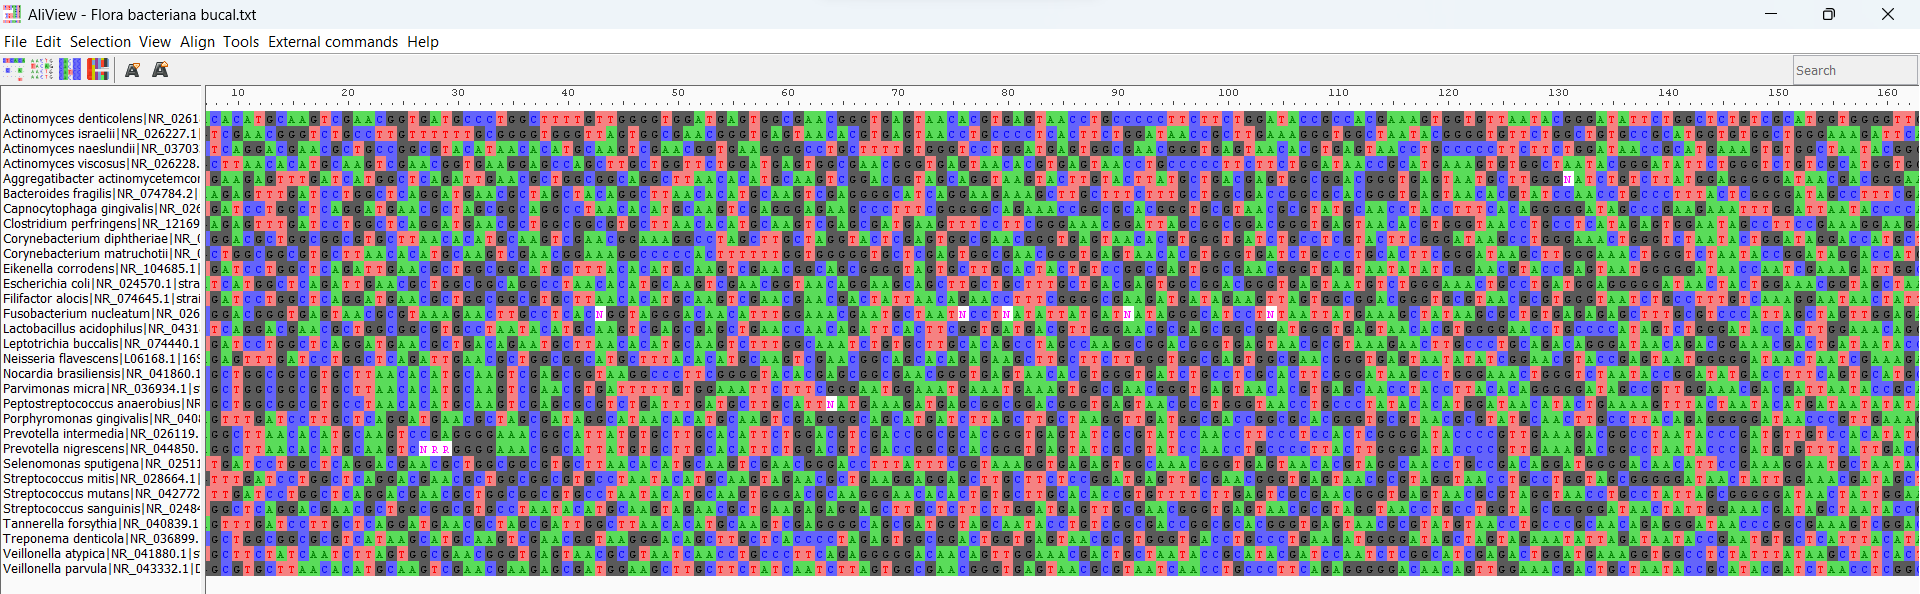
Secuencias nucleotídicas sin alinear. 

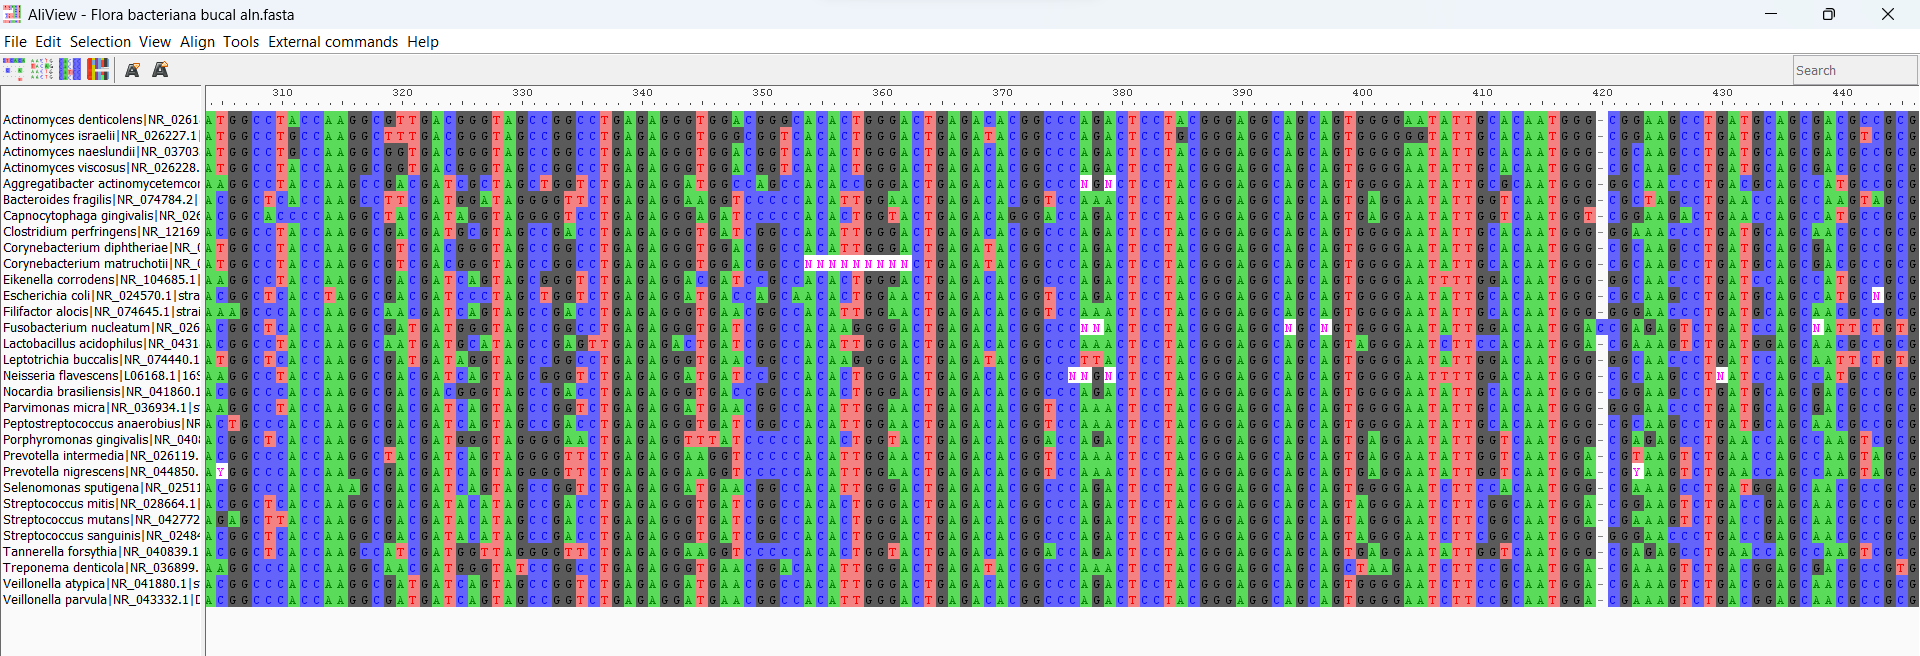

Secuencias nucleotídicas alineadas

##5. Inferencia filogenética
Se realizó la inferencia filogenética por máxima verosimilitud con IQ-TREE por medio del servidor Center for Integrative Bioinformatics Vienna (CIBIV): http://iqtree.cibiv.univie.ac.at/


Se cargo el archivo Flora bucal aln_cut.fasta en Input Data
y se pasaron los siguientes parámetros:

Substitution Model Options
* Substitution Model -> AUTO
* FreeRate Heterogeneity -> Yes [+R]

Branch Support Analysis:

* Bootstrap analysis -> Ultrafast
* Number of bootstrap alignments -> 10000
 
El resto de parámetros se dejaron los valores por default. 

Una vez finalizado el análisis se desgargaron los archivos para ser analizados.

El modelo elegido por el programa para realizar el análisis fue: TIM3+F+I+G4 segun el Criterio de Informacion Bayeciano.



##6.Revisión del arbol filogenético para su visualización y edición 

Se utilizó el programa FigTree en el que se cargó el archivo Flora_bacteriana_bucal_aln_cut.fasta.treefile originado por el servidor IQ-TREE.

Se resaltaron los organismos estudiados para su mejor visualización en el árbol. 


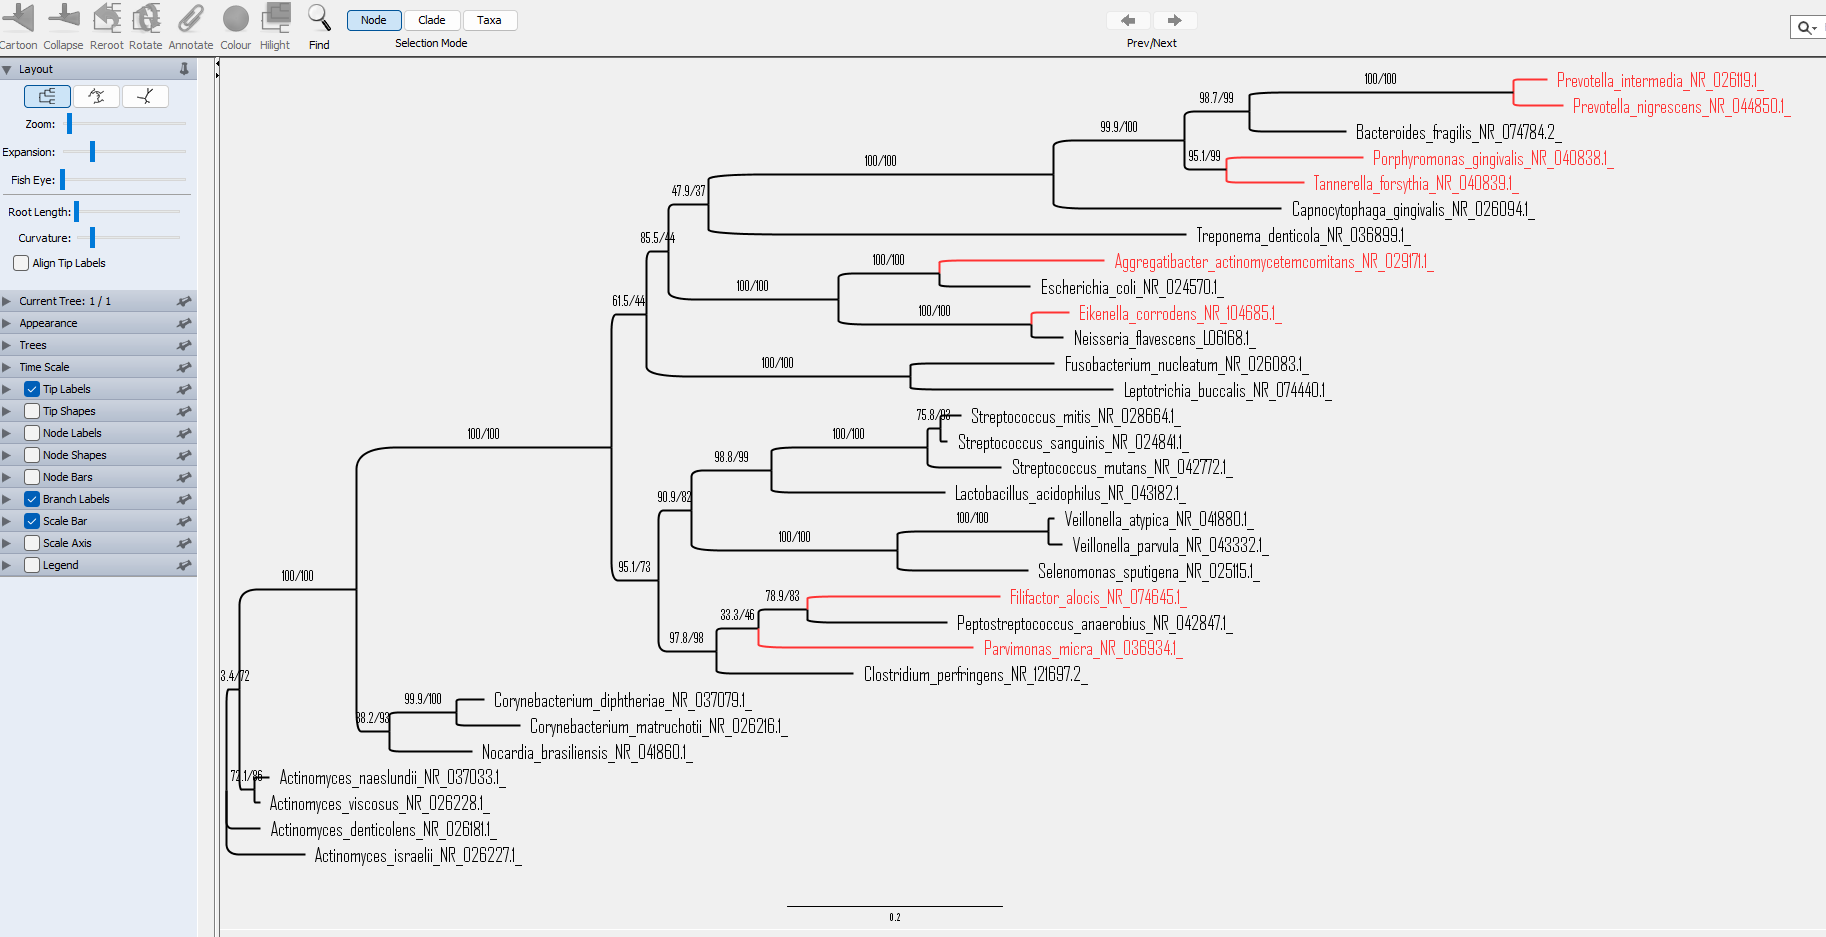